In [1]:
!pip install torch torchaudio transformers librosa soundfile \
matplotlib seaborn plotly datasets tqdm graphviz ipython torchviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
!pip install fsspec==2025.3.2
!pip install torch torchaudio transformers
!pip install datasets
!pip install torchviz
!pip install jiwer
!pip install torchsummary
!pip install onnx

  Using cached fsspec-2025.3.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2025.3.0-py3-none-any.whl (193 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 110.8 MB/s eta 0:00:00


In [3]:
import torch
import torchaudio
import librosa
import matplotlib.pyplot as plt
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from torchaudio.models import Conformer, RNNT
from torchaudio.pipelines import RNNTBundle
import torch.nn.functional as F
import IPython.display as ipd
import soundfile as sf
from torchviz import make_dot
import os


In [4]:
def load_audio(file_path, target_sr=16000):
    speech, sr = librosa.load(file_path, sr=target_sr)
    return torch.tensor(speech).unsqueeze(0), sr

def infer_wav2vec2(waveform):
    processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
    model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
    input_values = processor(waveform.squeeze(), return_tensors="pt", sampling_rate=16000).input_values
    with torch.no_grad():
        logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.decode(predicted_ids[0])
    return transcription, model

wav2vec2_output, wav2vec2_model = infer_wav2vec2(waveform)
print(wav2vec2_output)

In [5]:
file_path = "/content/LJ001-0004.wav"
waveform, sample_rate = load_audio(file_path)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


IN FOURTEEN SIXTY FIVE SWAYNHEIM AND PANARCHS BEGAN PRINTING IN THE MONASTERY OF SUBIACO NEAR ROME


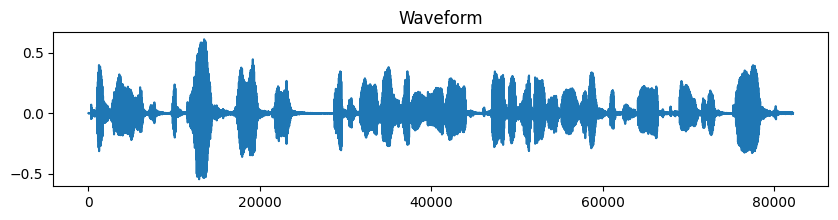

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:870: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_output.size() != (bsz, self.num_heads, tgt_len, self.head_dim):


ONNX model saved as 'wav2vec2.onnx'


In [9]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
from torchviz import make_dot
from jiwer import wer

waveform, sample_rate = torchaudio.load("/content/LJ001-0004.wav")

if sample_rate != 16000:
    waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
    sample_rate = 16000

plt.figure(figsize=(10, 2))
plt.plot(waveform.t().numpy())
plt.title("Waveform")
plt.show()

processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h").eval()
print(model)

inputs = processor(waveform.squeeze().numpy(), sampling_rate=sample_rate, return_tensors="pt", padding=True)
with torch.no_grad():
    logits = model(**inputs).logits

pred_ids = torch.argmax(logits, dim=-1)
transcription = processor.decode(pred_ids[0])
print("Transcription Output:", transcription)

reference = "Printing in the only sense with which we are at present concerned differs from most if not from all the arts and crafts represented in the Exhibition"
print("Word Error Rate (WER):", wer(reference.lower(), transcription.lower()))

dot = make_dot(logits, params=dict(list(model.named_parameters())))
dot.format = 'png'
dot.render('wav2vec2_architecture')
print("Computation graph saved as 'wav2vec2_architecture.png'")

torch.onnx.export(
    model,
    (inputs["input_values"],),
    "wav2vec2.onnx",
    input_names=["input_values"],
    output_names=["logits"],
    dynamic_axes={"input_values": {0: "batch_size", 1: "sequence"}},
    opset_version=17
)
print("ONNX model saved as 'wav2vec2.onnx'")


In [ ]:
file_path = "LJ001-0031.wav"
waveform, sample_rate = load_audio(file_path)

In [ ]:
pip install --upgrade torchaudio --index-url https://download.pytorch.org/whl/cu118


In [ ]:
pip show torchaudio


Name: torchaudio
Version: 2.7.0+cu118
Summary: An audio package for PyTorch
Home-page: https://github.com/pytorch/audio
Author: Soumith Chintala, David Pollack, Sean Naren, Peter Goldsborough, Moto Hira, Caroline Chen, Jeff Hwang, Zhaoheng Ni, Xiaohui Zhang
Author-email: soumith@pytorch.org
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: torch
Required-by: 
